In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
!pip install tensorflow
!pip install keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [69]:
pwd()

'C:\\Users\\rakes'

In [70]:
#READ THE DATASET 
df=pd.read_csv("D:\ML FINAL PROJECT\MatNavi Mechanical properties of low-alloy steels.csv")

In [71]:
#DATA EXPLORATION 
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

In [73]:
df.value_counts(df["Alloy code"])

Alloy code
LaD    11
CCA    11
CCB    11
LaA    10
CbS    10
       ..
LAG     9
CAB     9
LAJ     9
LAL     9
LAH     9
Length: 95, dtype: int64

In [74]:
df1=df.drop(['Alloy code'],axis=1)

<AxesSubplot:>

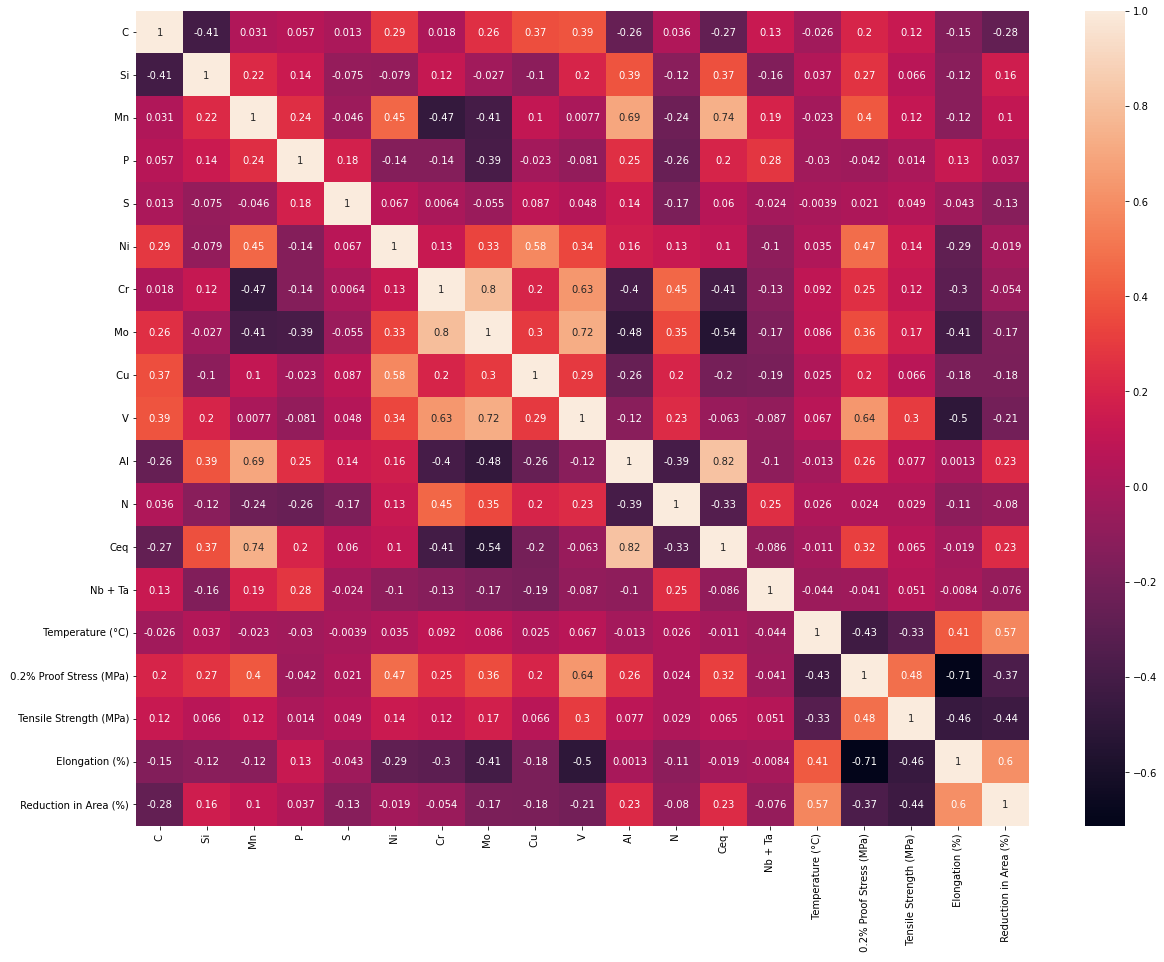

In [59]:
#Data visualisation 
plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)



In [61]:
materials = df.iloc[:, 1:16]
properties = df.iloc[:, 16:]

In [62]:
print(materials)

        C    Si    Mn      P      S     Ni    Cr     Mo    Cu      V     Al  \
0    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
1    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
2    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
3    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
4    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
..    ...   ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
910  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
911  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
912  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
913  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
914  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   

          N  Ceq  Nb + Ta   Temperature (°C)  
0   

In [51]:
materials['temp_sq']=np.power(materials.iloc[:,14],2)

In [34]:
print(materials)

        C    Si    Mn      P      S     Ni    Cr     Mo    Cu      V     Al  \
0    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
1    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
2    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
3    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
4    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
..    ...   ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
910  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
911  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
912  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
913  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
914  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   

          N  Ceq  Nb + Ta   Temperature (°C)  temp_

In [16]:
print(properties)

      0.2% Proof Stress (MPa)   Tensile Strength (MPa)   Elongation (%)  \
0                         342                      490               30   
1                         338                      454               27   
2                         337                      465               23   
3                         346                      495               21   
4                         316                      489               26   
..                        ...                      ...              ...   
910                       268                      632               28   
911                       244                      575               28   
912                       224                      500               29   
913                       209                      428               30   
914                       200                      328               40   

      Reduction in Area (%)  
0                        71  
1                        72  
2        

In [64]:
#SPLITING THE DATA 
materials_train,materials_test,properties_train,properties_test=train_test_split(materials,properties, test_size=0.2, shuffle=True)

## 1.Linear Regression 

In [65]:
#Full Model fiting without scaling 
lm=LinearRegression()
lm.fit(materials_train,properties_train)

LinearRegression()

In [66]:
#Prediction 
properties_lm_pred=lm.predict(materials_test)

In [67]:
#Fitting Accuracy 
print('RMSE:', np.sqrt(metrics.mean_squared_error(properties_test,properties_lm_pred)))

RMSE: 228.2091095378902


In [21]:
# To be used later while visualizing results
actual_proof_strength = np.transpose(properties_test.iloc[:,0])
actual_tensile_strength = np.transpose(properties_test.iloc[:,1])
actual_pct_elongation = np.transpose(properties_test.iloc[:,2])
actual_pct_reduction_area = np.transpose(properties_test.iloc[:,3])

In [22]:
# Visualizing the accuracy of predicted values
lr_predicted_proof_strength = np.transpose(properties_lm_pred)[0]
lr_predicted_tensile_strength = np.transpose(properties_lm_pred)[1]
lr_predicted_pct_elongation = np.transpose(properties_lm_pred)[2]
lr_predicted_pct_reduction_area = np.transpose(properties_lm_pred)[3]

In [23]:
print('RMSE of proof strength:', np.sqrt(metrics.mean_squared_error(actual_proof_strength,lr_predicted_proof_strength)))
print('RMSE of tensile strength:', np.sqrt(metrics.mean_squared_error(actual_tensile_strength,lr_predicted_tensile_strength)))
print('RMSE of pct_elongation:', np.sqrt(metrics.mean_squared_error(actual_pct_elongation,lr_predicted_pct_elongation)))
print('RMSE of pct_reduction:', np.sqrt(metrics.mean_squared_error(actual_pct_reduction_area,lr_predicted_pct_reduction_area)))

RMSE of proof strength: 63.5094952818906
RMSE of tensile strength: 452.6983398949425
RMSE of pct_elongation: 6.348547772416523
RMSE of pct_reduction: 9.438137178768484


12.537120005994653


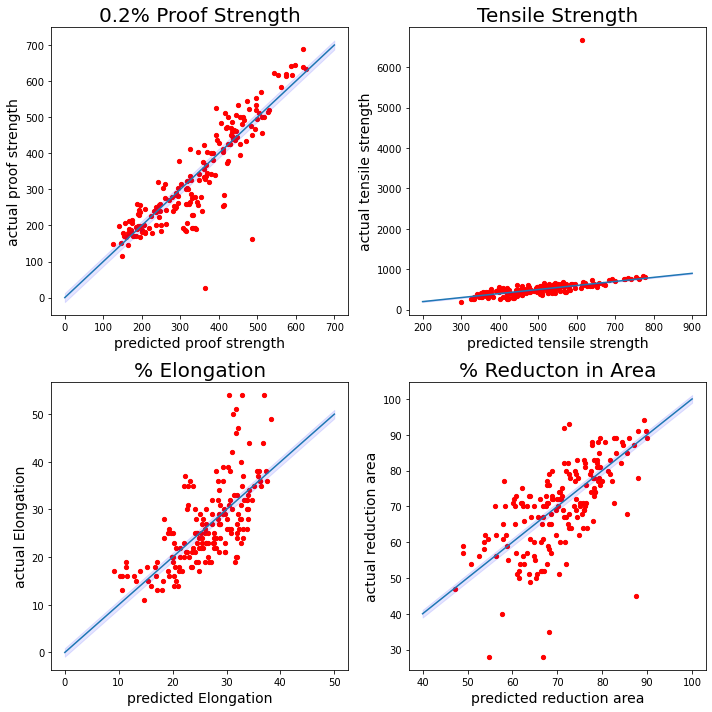

In [24]:
#Plotting the fiting 
fig, axs = plt.subplots(2,2, figsize=(10,10))


axs[0,0].scatter(lr_predicted_proof_strength,actual_proof_strength, color = 'red', s=18)
x3 = np.linspace(0,700, 1000)
y3 = x3
axs[0,0].plot(x3, y3)

#some confidence interval
ci = 1.96 * np.std(y3)/np.sqrt(len(x3))
print(ci)
axs[0,0].fill_between(x3, (y3-ci), (y3+ci), color='b', alpha=.1)

axs[0,0].set_title('0.2% Proof Strength', fontsize = 20)
axs[0,0].set_xlabel('predicted proof strength', fontsize = 14)
axs[0,0].set_ylabel('actual proof strength', fontsize = 14)

axs[0,1].scatter(lr_predicted_tensile_strength, actual_tensile_strength, color = 'red', s=18)
x4 = np.linspace(200, 900, 1000)
y4 = x4
axs[0,1].plot(x4, y4)

#some confidence interval
ci = 1.96 * np.std(y4)/np.sqrt(len(x4))
axs[0,1].fill_between(x4, (y4-ci), (y4+ci), color='b', alpha=.1)

axs[0,1].set_title('Tensile Strength', fontsize = 20)
axs[0,1].set_xlabel('predicted tensile strength', fontsize = 14)
axs[0,1].set_ylabel('actual tensile strength', fontsize = 14)

axs[1,0].scatter(lr_predicted_pct_elongation, actual_pct_elongation, color = 'red', s=18)
x5 = np.linspace(0,50, 1000 )
y5 = x5
axs[1,0].plot(x5, y5)

#some confidence interval
ci = 1.96 * np.std(y5)/np.sqrt(len(x5))
axs[1,0].fill_between(x5, (y5-ci), (y5+ci), color='b', alpha=.1)

axs[1,0].set_title('% Elongation', fontsize = 20)
axs[1,0].set_xlabel('predicted Elongation', fontsize = 14)
axs[1,0].set_ylabel('actual Elongation', fontsize = 14)

axs[1,1].scatter(lr_predicted_pct_reduction_area, actual_pct_reduction_area, color = 'red', s=18)
x6 = np.linspace(40, 100,1000 )
y6 = x6
axs[1,1].plot(x6, y6)

#some confidence interval
ci = 1.96 * np.std(y6)/np.sqrt(len(x6))
axs[1,1].fill_between(x6, (y6-ci), (y6+ci), color='b', alpha=.1)

axs[1,1].set_title('% Reducton in Area', fontsize = 20)
axs[1,1].set_xlabel('predicted reduction area', fontsize = 14)
axs[1,1].set_ylabel('actual reduction area', fontsize = 14)

fig.tight_layout()
plt.show()



## 1.1 Linear Regression with scaled features

In [25]:
# scaling
sc_materials = StandardScaler()
sc_materials.fit(materials_train)
materials_train_sc = sc_materials.transform(materials_train)
materials_test_sc = sc_materials.transform(materials_test)

sc_properties = StandardScaler()
sc_properties.fit(properties_train)
properties_train_sc = sc_properties.transform(properties_train)
properties_test_sc = sc_properties.transform(properties_test)


In [26]:
materials_train_sc

array([[ 2.79760982, -1.05616567, -0.31124834, ..., -0.52607015,
        -0.15877684,  0.77577689],
       [ 1.10690411, -0.82469463, -0.48711386, ..., -0.52607015,
        -0.15877684, -1.32890205],
       [-1.26008389, -0.36175255, -0.92677767, ..., -0.52607015,
        -0.15877684,  0.51269203],
       ...,
       [-0.07658989, -0.94043015,  1.56465057, ..., -0.52607015,
        -0.15877684,  1.30194663],
       [ 0.59969239,  0.10118953, -0.95608859, ..., -0.52607015,
        -0.15877684,  1.03886176],
       [-0.92194275,  0.67986713, -1.04402135, ..., -0.52607015,
        -0.15877684,  0.77577689]])

In [27]:
sc_lm=LinearRegression()

In [28]:
sc_lm.fit(materials_train_sc, properties_train_sc)
properties_lmsc_pred = sc_lm.predict(materials_test_sc)

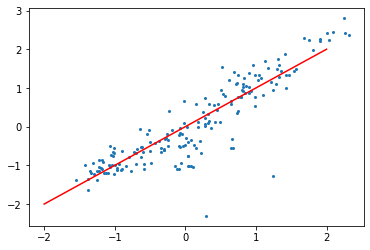

RSME 0 = 0.4892020353421653


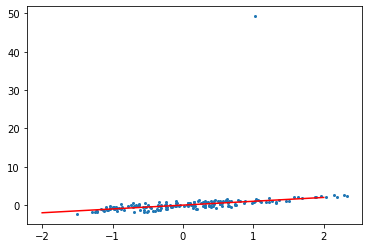

RSME 1 = 3.6124423668789536


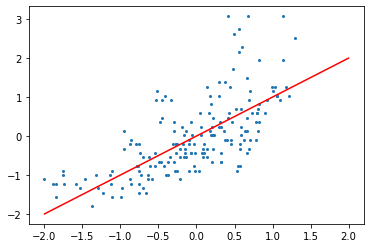

RSME 2 = 0.7189389436964851


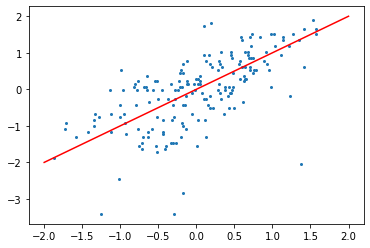

RSME 3 = 0.7600469925046557


In [29]:
for i in range (0,4,1):
    plt.scatter(properties_lmsc_pred[:,i],properties_test_sc[:,i],s=4)
    x3 = np.linspace(-2,2, 1000)
    y3 = x3
    plt.plot(x3, y3,c='r')
    plt.show()
    print('RSME',str(i),'=',np.sqrt(metrics.mean_squared_error(properties_lmsc_pred[:,i],properties_test_sc[:,i])))

In [30]:
from sklearn import metrics# Determining the model's accuracy
mse_lm_sc =metrics.mean_squared_error(properties_test_sc, properties_lmsc_pred)
print('mean_squared_error = ' + str(round(mse_lm_sc, 2)) + '    Lower is better')
mse_lm_sc =np.sqrt(metrics.mean_squared_error(properties_test_sc, properties_lmsc_pred))
print('Root mean_squared_error = ' + str(round(mse_lm_sc, 2)) + '    Lower is better')

mean_squared_error = 3.6    Lower is better
Root mean_squared_error = 1.9    Lower is better



# 1.3 Linear Regression with Regularization


In [ ]:
#SPLITING THE DATA 
materials_train,materials_test,properties_train,properties_test=train_test_split(materials,properties, test_size=0.2, shuffle=True)

In [ ]:
# scaling
sc_materials = StandardScaler()
sc_materials.fit(materials_train)
materials_train_sc = sc_materials.transform(materials_train)
materials_test_sc = sc_materials.transform(materials_test)

sc_properties = StandardScaler()
sc_properties.fit(properties_train)
properties_train_sc = sc_properties.transform(properties_train)
properties_test_sc = sc_properties.transform(properties_test)

In [ ]:
lr = LinearRegression()
lr.fit(materials_train_sc, properties_train_sc)
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(materials_train_sc, properties_train_sc)
rr100 = RidgeCV(alphas=100) #  comparison with alpha value
rr100.fit(materials_train_sc, properties_train_sc)
train_score=lr.score(materials_train_sc, properties_train_sc)
test_score=lr.score(materials_test_sc, properties_test_sc)
Ridge_train_score = rr.score(materials_train_sc, properties_train_sc)
Ridge_test_score = rr.score(materials_test_sc, properties_test_sc)
Ridge_train_score100 = rr100.score(materials_train_sc, properties_train_sc)
Ridge_test_score100 = rr100.score(materials_test_sc, properties_test_sc)
print(rr.coef_)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(materials_train_sc, properties_train_sc)
lasso100 = Lasso(alpha=100, max_iter=10e5)
lasso100.fit(materials_train_sc, properties_train_sc)

plt.plot(rr.coef_[1,:],linestyle='none',marker='d',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_[1,:],linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_[1,:],linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(lasso001.coef_[1,:],linestyle='none',marker='*',markersize=6,color='red',label=r'Lasso; $\alpha = 0.01$')
plt.plot(lasso100.coef_[1,:],linestyle='none',marker='*',markersize=6,color='blue',label=r'Lasso; $\alpha = 100$')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=8,loc=3)
plt.show()

## NN

In [35]:
## Neural Nets
# Building the Neural Network

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_dim = 15))

model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'tanh'))

model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [36]:
nn_fit = model.fit(materials_train_sc, properties_train_sc, batch_size = 100, shuffle=True, epochs = 5000)

Epoch 1/5000
8/8 [==============================] - 0s 571us/step - loss: 0.9991 - mean_squared_error: 0.9991
Epoch 2/5000
8/8 [==============================] - 0s 571us/step - loss: 0.9670 - mean_squared_error: 0.9670
Epoch 3/5000
8/8 [==============================] - 0s 714us/step - loss: 0.9367 - mean_squared_error: 0.9367
Epoch 4/5000
8/8 [==============================] - 0s 429us/step - loss: 0.9036 - mean_squared_error: 0.9036
Epoch 5/5000
8/8 [==============================] - 0s 714us/step - loss: 0.8660 - mean_squared_error: 0.8660
Epoch 6/5000
8/8 [==============================] - 0s 572us/step - loss: 0.8258 - mean_squared_error: 0.8258
Epoch 7/5000
8/8 [==============================] - 0s 572us/step - loss: 0.7879 - mean_squared_error: 0.7879
Epoch 8/5000
8/8 [==============================] - 0s 572us/step - loss: 0.7518 - mean_squared_error: 0.7518
Epoch 9/5000
8/8 [==============================] - 0s 572us/step - loss: 0.7195 - mean_squared_error: 0.7195
Epoch 10/5

8/8 [==============================] - 0s 429us/step - loss: 0.3174 - mean_squared_error: 0.3174
Epoch 148/5000
8/8 [==============================] - 0s 571us/step - loss: 0.3163 - mean_squared_error: 0.3163
Epoch 149/5000
8/8 [==============================] - 0s 429us/step - loss: 0.3155 - mean_squared_error: 0.3155
Epoch 150/5000
8/8 [==============================] - 0s 429us/step - loss: 0.3143 - mean_squared_error: 0.3143
Epoch 151/5000
8/8 [==============================] - 0s 572us/step - loss: 0.3136 - mean_squared_error: 0.3136
Epoch 152/5000
8/8 [==============================] - 0s 571us/step - loss: 0.3127 - mean_squared_error: 0.3127
Epoch 153/5000
8/8 [==============================] - 0s 429us/step - loss: 0.3116 - mean_squared_error: 0.3116
Epoch 154/5000
8/8 [==============================] - 0s 429us/step - loss: 0.3108 - mean_squared_error: 0.3108
Epoch 155/5000
8/8 [==============================] - 0s 572us/step - loss: 0.3099 - mean_squared_error: 0.3099
Epoch 1

8/8 [==============================] - 0s 429us/step - loss: 0.2344 - mean_squared_error: 0.2344
Epoch 294/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2342 - mean_squared_error: 0.2342
Epoch 295/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2340 - mean_squared_error: 0.2340
Epoch 296/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2337 - mean_squared_error: 0.2337
Epoch 297/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2335 - mean_squared_error: 0.2335
Epoch 298/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2335 - mean_squared_error: 0.2335
Epoch 299/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2333 - mean_squared_error: 0.2333
Epoch 300/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2328 - mean_squared_error: 0.2328
Epoch 301/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2328 - mean_squared_error: 0.2328
Epoch 3

8/8 [==============================] - 0s 571us/step - loss: 0.2204 - mean_squared_error: 0.2204
Epoch 440/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2203 - mean_squared_error: 0.2203
Epoch 441/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2203 - mean_squared_error: 0.2203
Epoch 442/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2202 - mean_squared_error: 0.2202
Epoch 443/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2200 - mean_squared_error: 0.2200
Epoch 444/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2203 - mean_squared_error: 0.2203
Epoch 445/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2200 - mean_squared_error: 0.2200
Epoch 446/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2200 - mean_squared_error: 0.2200
Epoch 447/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2202 - mean_squared_error: 0.2202
Epoch 4

8/8 [==============================] - 0s 429us/step - loss: 0.2148 - mean_squared_error: 0.2148
Epoch 586/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2149 - mean_squared_error: 0.2149
Epoch 587/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2147 - mean_squared_error: 0.2147
Epoch 588/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2147 - mean_squared_error: 0.2147
Epoch 589/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2147 - mean_squared_error: 0.2147
Epoch 590/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2147 - mean_squared_error: 0.2147
Epoch 591/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2147 - mean_squared_error: 0.2147
Epoch 592/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2146 - mean_squared_error: 0.2146
Epoch 593/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2146 - mean_squared_error: 0.2146
Epoch 5

8/8 [==============================] - 0s 572us/step - loss: 0.2112 - mean_squared_error: 0.2112
Epoch 732/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2113 - mean_squared_error: 0.2113
Epoch 733/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2112 - mean_squared_error: 0.2112
Epoch 734/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2112 - mean_squared_error: 0.2112
Epoch 735/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2112 - mean_squared_error: 0.2112
Epoch 736/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2113 - mean_squared_error: 0.2113
Epoch 737/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2110 - mean_squared_error: 0.2110
Epoch 738/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2110 - mean_squared_error: 0.2110
Epoch 739/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2112 - mean_squared_error: 0.2112
Epoch 7

8/8 [==============================] - 0s 571us/step - loss: 0.2088 - mean_squared_error: 0.2088
Epoch 878/5000
8/8 [==============================] - 0s 428us/step - loss: 0.2085 - mean_squared_error: 0.2085
Epoch 879/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2085 - mean_squared_error: 0.2085
Epoch 880/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2086 - mean_squared_error: 0.2086
Epoch 881/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2085 - mean_squared_error: 0.2085
Epoch 882/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 883/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 884/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 885/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2085 - mean_squared_error: 0.2085
Epoch 8

8/8 [==============================] - 0s 571us/step - loss: 0.2064 - mean_squared_error: 0.2064
Epoch 1024/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2062 - mean_squared_error: 0.2062
Epoch 1025/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2063 - mean_squared_error: 0.2063
Epoch 1026/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2062 - mean_squared_error: 0.2062
Epoch 1027/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2063 - mean_squared_error: 0.2063
Epoch 1028/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2063 - mean_squared_error: 0.2063
Epoch 1029/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2063 - mean_squared_error: 0.2063
Epoch 1030/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2063 - mean_squared_error: 0.2063
Epoch 1031/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2062 - mean_squared_error: 0.2062

8/8 [==============================] - 0s 572us/step - loss: 0.2044 - mean_squared_error: 0.2044
Epoch 1168/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2040 - mean_squared_error: 0.2040
Epoch 1169/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2042 - mean_squared_error: 0.2042
Epoch 1170/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2041 - mean_squared_error: 0.2041
Epoch 1171/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2041 - mean_squared_error: 0.2041
Epoch 1172/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2043 - mean_squared_error: 0.2043
Epoch 1173/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2042 - mean_squared_error: 0.2042
Epoch 1174/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2042 - mean_squared_error: 0.2042
Epoch 1175/5000
8/8 [==============================] - 0s 428us/step - loss: 0.2041 - mean_squared_error: 0.2041

8/8 [==============================] - 0s 429us/step - loss: 0.2023 - mean_squared_error: 0.2023
Epoch 1312/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 1313/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 1314/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 1315/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2023 - mean_squared_error: 0.2023
Epoch 1316/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 1317/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2022 - mean_squared_error: 0.2022
Epoch 1318/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2023 - mean_squared_error: 0.2023
Epoch 1319/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2022 - mean_squared_error: 0.2022

8/8 [==============================] - 0s 429us/step - loss: 0.2009 - mean_squared_error: 0.2009
Epoch 1456/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2010 - mean_squared_error: 0.2010
Epoch 1457/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2010 - mean_squared_error: 0.2010
Epoch 1458/5000
8/8 [==============================] - 0s 571us/step - loss: 0.2009 - mean_squared_error: 0.2009
Epoch 1459/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2008 - mean_squared_error: 0.2008
Epoch 1460/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2009 - mean_squared_error: 0.2009
Epoch 1461/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2009 - mean_squared_error: 0.2009
Epoch 1462/5000
8/8 [==============================] - 0s 572us/step - loss: 0.2009 - mean_squared_error: 0.2009
Epoch 1463/5000
8/8 [==============================] - 0s 429us/step - loss: 0.2007 - mean_squared_error: 0.2007

8/8 [==============================] - 0s 571us/step - loss: 0.1999 - mean_squared_error: 0.1999
Epoch 1600/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1998 - mean_squared_error: 0.1998
Epoch 1601/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1997 - mean_squared_error: 0.1997
Epoch 1602/5000
8/8 [==============================] - 0s 714us/step - loss: 0.1999 - mean_squared_error: 0.1999
Epoch 1603/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1998 - mean_squared_error: 0.1998
Epoch 1604/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1998 - mean_squared_error: 0.1998
Epoch 1605/5000
8/8 [==============================] - 0s 585us/step - loss: 0.1999 - mean_squared_error: 0.1999
Epoch 1606/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1998 - mean_squared_error: 0.1998
Epoch 1607/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1997 - mean_squared_error: 0.1997

8/8 [==============================] - 0s 571us/step - loss: 0.1990 - mean_squared_error: 0.1990
Epoch 1744/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1990 - mean_squared_error: 0.1990
Epoch 1745/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1991 - mean_squared_error: 0.1991
Epoch 1746/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1989 - mean_squared_error: 0.1989
Epoch 1747/5000
8/8 [==============================] - 0s 428us/step - loss: 0.1991 - mean_squared_error: 0.1991
Epoch 1748/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1990 - mean_squared_error: 0.1990
Epoch 1749/5000
8/8 [==============================] - 0s 428us/step - loss: 0.1989 - mean_squared_error: 0.1989
Epoch 1750/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1992 - mean_squared_error: 0.1992
Epoch 1751/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1989 - mean_squared_error: 0.1989

8/8 [==============================] - 0s 429us/step - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 1888/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1985 - mean_squared_error: 0.1985
Epoch 1889/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 1890/5000
8/8 [==============================] - 0s 714us/step - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 1891/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 1892/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 1893/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 1894/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 1895/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1982 - mean_squared_error: 0.1982

8/8 [==============================] - 0s 571us/step - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 2032/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1977 - mean_squared_error: 0.1977
Epoch 2033/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 2034/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 2035/5000
8/8 [==============================] - 0s 428us/step - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 2036/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 2037/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 2038/5000
8/8 [==============================] - 0s 714us/step - loss: 0.1977 - mean_squared_error: 0.1977
Epoch 2039/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1978 - mean_squared_error: 0.1978

8/8 [==============================] - 0s 429us/step - loss: 0.1972 - mean_squared_error: 0.1972
Epoch 2176/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1972 - mean_squared_error: 0.1972
Epoch 2177/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1972 - mean_squared_error: 0.1972
Epoch 2178/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1972 - mean_squared_error: 0.1972
Epoch 2179/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1974 - mean_squared_error: 0.1974
Epoch 2180/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1972 - mean_squared_error: 0.1972
Epoch 2181/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1972 - mean_squared_error: 0.1972
Epoch 2182/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1972 - mean_squared_error: 0.1972
Epoch 2183/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1972 - mean_squared_error: 0.1972

8/8 [==============================] - 0s 429us/step - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 2320/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 2321/5000
8/8 [==============================] - 0s 1ms/step - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 2322/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 2323/5000
8/8 [==============================] - 0s 714us/step - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 2324/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 2325/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 2326/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 2327/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1970 - mean_squared_error: 0.1970
E

8/8 [==============================] - 0s 429us/step - loss: 0.1963 - mean_squared_error: 0.1963
Epoch 2464/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1964 - mean_squared_error: 0.1964
Epoch 2465/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1964 - mean_squared_error: 0.1964
Epoch 2466/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1964 - mean_squared_error: 0.1964
Epoch 2467/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1963 - mean_squared_error: 0.1963
Epoch 2468/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1965 - mean_squared_error: 0.1965
Epoch 2469/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 2470/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1963 - mean_squared_error: 0.1963
Epoch 2471/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1962 - mean_squared_error: 0.1962

8/8 [==============================] - 0s 429us/step - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 2608/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 2609/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 2610/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1961 - mean_squared_error: 0.1961
Epoch 2611/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1961 - mean_squared_error: 0.1961
Epoch 2612/5000
8/8 [==============================] - 0s 1ms/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 2613/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 2614/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1961 - mean_squared_error: 0.1961
Epoch 2615/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1960 - mean_squared_error: 0.1960
E

8/8 [==============================] - 0s 1ms/step - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 2752/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 2753/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 2754/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 2755/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 2756/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 2757/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 2758/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 2759/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1957 - mean_squared_error: 0.1957
E

8/8 [==============================] - 0s 429us/step - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 2896/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 2897/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1956 - mean_squared_error: 0.1956
Epoch 2898/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 2899/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 2900/5000
8/8 [==============================] - 0s 851us/step - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 2901/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 2902/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 2903/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1955 - mean_squared_error: 0.1955

8/8 [==============================] - 0s 429us/step - loss: 0.1953 - mean_squared_error: 0.1953
Epoch 3040/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1951 - mean_squared_error: 0.1951
Epoch 3041/5000
8/8 [==============================] - 0s 1ms/step - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 3042/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 3043/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 3044/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 3045/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1953 - mean_squared_error: 0.1953
Epoch 3046/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 3047/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1953 - mean_squared_error: 0.1953
E

8/8 [==============================] - 0s 572us/step - loss: 0.1950 - mean_squared_error: 0.1950
Epoch 3184/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1951 - mean_squared_error: 0.1951
Epoch 3185/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 3186/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1951 - mean_squared_error: 0.1951
Epoch 3187/5000
8/8 [==============================] - 0s 714us/step - loss: 0.1951 - mean_squared_error: 0.1951
Epoch 3188/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1950 - mean_squared_error: 0.1950
Epoch 3189/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 3190/5000
8/8 [==============================] - 0s 941us/step - loss: 0.1950 - mean_squared_error: 0.1950
Epoch 3191/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1951 - mean_squared_error: 0.1951

8/8 [==============================] - 0s 429us/step - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 3328/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 3329/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1949 - mean_squared_error: 0.1949
Epoch 3330/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1949 - mean_squared_error: 0.1949
Epoch 3331/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 3332/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1949 - mean_squared_error: 0.1949
Epoch 3333/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1947 - mean_squared_error: 0.1947
Epoch 3334/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 3335/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1950 - mean_squared_error: 0.1950

8/8 [==============================] - 0s 429us/step - loss: 0.1947 - mean_squared_error: 0.1947
Epoch 3472/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1947 - mean_squared_error: 0.1947
Epoch 3473/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 3474/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1947 - mean_squared_error: 0.1947
Epoch 3475/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 3476/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 3477/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 3478/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 3479/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1947 - mean_squared_error: 0.1947

8/8 [==============================] - 0s 572us/step - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 3616/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 3617/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 3618/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 3619/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 3620/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 3621/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 3622/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1943 - mean_squared_error: 0.1943
Epoch 3623/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1945 - mean_squared_error: 0.1945

8/8 [==============================] - 0s 429us/step - loss: 0.1943 - mean_squared_error: 0.1943
Epoch 3760/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 3761/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 3762/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 3763/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 3764/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 3765/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 3766/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1943 - mean_squared_error: 0.1943
Epoch 3767/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1942 - mean_squared_error: 0.1942

8/8 [==============================] - 0s 429us/step - loss: 0.1941 - mean_squared_error: 0.1941
Epoch 3904/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1940 - mean_squared_error: 0.1940
Epoch 3905/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1941 - mean_squared_error: 0.1941
Epoch 3906/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1940 - mean_squared_error: 0.1940
Epoch 3907/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 3908/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1941 - mean_squared_error: 0.1941
Epoch 3909/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1941 - mean_squared_error: 0.1941
Epoch 3910/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1941 - mean_squared_error: 0.1941
Epoch 3911/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1940 - mean_squared_error: 0.1940

8/8 [==============================] - 0s 429us/step - loss: 0.1940 - mean_squared_error: 0.1940
Epoch 4048/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 4049/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 4050/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1940 - mean_squared_error: 0.1940
Epoch 4051/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 4052/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 4053/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 4054/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 4055/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1939 - mean_squared_error: 0.1939

8/8 [==============================] - 0s 572us/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 4192/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 4193/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 4194/5000
8/8 [==============================] - 0s 428us/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 4195/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 4196/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 4197/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 4198/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 4199/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1937 - mean_squared_error: 0.1937

8/8 [==============================] - 0s 429us/step - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 4336/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 4337/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 4338/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4339/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 4340/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 4341/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 4342/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 4343/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1936 - mean_squared_error: 0.1936

8/8 [==============================] - 0s 429us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4480/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 4481/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 4482/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4483/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4484/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4485/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4486/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4487/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1934 - mean_squared_error: 0.1934

8/8 [==============================] - 0s 572us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4624/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 4625/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1933 - mean_squared_error: 0.1933
Epoch 4626/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1933 - mean_squared_error: 0.1933
Epoch 4627/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1933 - mean_squared_error: 0.1933
Epoch 4628/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4629/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1935 - mean_squared_error: 0.1935
Epoch 4630/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1933 - mean_squared_error: 0.1933
Epoch 4631/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1935 - mean_squared_error: 0.1935

8/8 [==============================] - 0s 571us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4768/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4769/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4770/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4771/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 4772/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1933 - mean_squared_error: 0.1933
Epoch 4773/5000
8/8 [==============================] - 0s 428us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4774/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4775/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1933 - mean_squared_error: 0.1933

8/8 [==============================] - 0s 429us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4912/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4913/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1931 - mean_squared_error: 0.1931
Epoch 4914/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4915/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4916/5000
8/8 [==============================] - 0s 571us/step - loss: 0.1930 - mean_squared_error: 0.1930
Epoch 4917/5000
8/8 [==============================] - 0s 572us/step - loss: 0.1932 - mean_squared_error: 0.1932
Epoch 4918/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1931 - mean_squared_error: 0.1931
Epoch 4919/5000
8/8 [==============================] - 0s 429us/step - loss: 0.1932 - mean_squared_error: 0.1932

In [37]:
properties_nn_pred = model.predict(materials_test_sc)

In [38]:
# Determining the model's accuracy
mse_nn = np.sqrt(metrics.mean_squared_error(properties_test_sc, properties_nn_pred))
print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')


mean_squared_error = 1.86    Lower is better


In [ ]:
pip3 install keras
pip3 install ann_visualizer
pip install graphviz


## extra parameters

In [ ]:
materials_train,materials_test,properties_train,properties_test=train_test_split(materials_extra,properties, test_size=0.2, shuffle=True)

In [ ]:
# scaling
sc_materials = StandardScaler()
sc_materials.fit(materials_train)
materials_train_sc = sc_materials.transform(materials_train)
materials_test_sc = sc_materials.transform(materials_test)

sc_properties = StandardScaler()
sc_properties.fit(properties_train)
properties_train_sc = sc_properties.transform(properties_train)
properties_test_sc = sc_properties.transform(properties_test)

In [ ]:
sc_lm=LinearRegression()

In [ ]:
sc_lm.fit(materials_train_sc, properties_train_sc)
properties_lmsc_pred = sc_lm.predict(materials_test_sc)

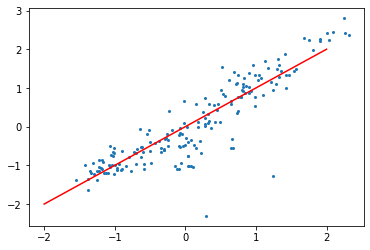

RSME 0 = 0.4892020353421653


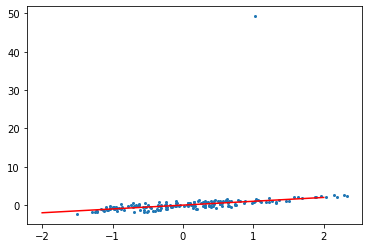

RSME 1 = 3.6124423668789536


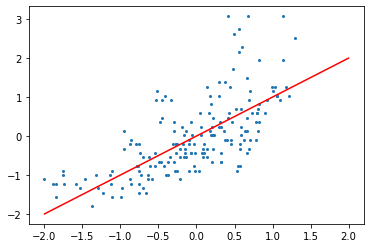

RSME 2 = 0.7189389436964851


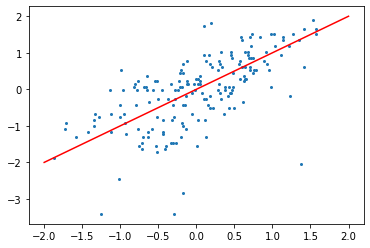

RSME 3 = 0.7600469925046557


In [40]:
for i in range (0,4,1):
    plt.scatter(properties_lmsc_pred[:,i],properties_test_sc[:,i],s=4)
    x3 = np.linspace(-2,2, 1000)
    y3 = x3
    plt.plot(x3, y3,c='r')
    plt.show()
    print('RSME',str(i),'=',np.sqrt(metrics.mean_squared_error(properties_lmsc_pred[:,i],properties_test_sc[:,i])))

In [39]:
# Determining the model's accuracy
mse_lm_sc = np.sqrt(metrics.mean_squared_error(properties_test_sc, properties_lmsc_pred))
print('mean_squared_error = ' + str(round(mse_lm_sc, 2)) + '    Lower is better')


mean_squared_error = 1.9    Lower is better


# Multiple parameters

In [ ]:
materials['ceq_sq']=np.power(materials.iloc[:,13],2)
materials['mo_sq']=np.power(materials.iloc[:,8],2)
materials['ni_sq']=np.power(materials.iloc[:,6],2)
materials['mn_sq']=np.power(materials.iloc[:,3],2)
materials['v_sq']=np.power(materials.iloc[:,10],2)
materials['temp_sq']=np.power(materials.iloc[:,15],2)


In [ ]:
print(materials)

In [ ]:
materials_train,materials_test,properties_train,properties_test=train_test_split(materials,properties, test_size=0.2, shuffle=True)

In [ ]:
# scaling
sc_materials = StandardScaler()
sc_materials.fit(materials_train)
materials_train_sc = sc_materials.transform(materials_train)
materials_test_sc = sc_materials.transform(materials_test)

sc_properties = StandardScaler()
sc_properties.fit(properties_train)
properties_train_sc = sc_properties.transform(properties_train)
properties_test_sc = sc_properties.transform(properties_test)

In [ ]:
sc_lm=LinearRegression()

In [ ]:
sc_lm.fit(materials_train_sc, properties_train_sc)
properties_lmsc_pred = sc_lm.predict(materials_test_sc)

In [ ]:
for i in range (0,4,1):
    plt.scatter(properties_lmsc_pred[:,i],properties_test_sc[:,i],s=4)
    x3 = np.linspace(-2,2,1000)
    y3 = x3
    plt.plot(x3, y3,c='r')
    plt.show()
    print('RSME',str(i),'=',np.sqrt(metrics.mean_squared_error(properties_lmsc_pred[:,i],properties_test_sc[:,i])))

In [ ]:
# Determining the model's accuracy
mse_lm_sc = np.sqrt(metrics.mean_squared_error(properties_test_sc, properties_lmsc_pred))
print('mean_squared_error = ' + str(round(mse_lm_sc, 2)) + '    Lower is better')


## 2. Deep Neural Network

In [ ]:
## Neural Nets
# Building the Neural Network

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_dim = 15))
model.add(Dense(units = 90, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 60, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 40, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'tanh'))

model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [ ]:
nn_fit = model.fit(materials_train_sc, properties_train_sc, batch_size = 100, shuffle=True, epochs = 5000)

In [ ]:
properties_nn_pred = model.predict(materials_test_sc)

In [ ]:
print(properties_nn_pred)

In [ ]:
# Determining the model's accuracy
mse_nn = metrics.mean_squared_error(properties_test_sc, properties_nn_pred)
print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')


## KNN 

In [ ]:
#Fitting of KNN Regressor with K=50
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(materials_train_sc, properties_train_sc)

In [ ]:
#prediction
properties_knn_pred=knn.predict(materials_test_sc)

In [ ]:
# Determining the model's accuracy
mse_knn = np.sqrt(metrics.mean_squared_error(properties_test_sc, properties_knn_pred))
print('mean_squared_error = ' + str(round(mse_knn, 2)) + '    Lower is better')

In [ ]:
for i in range (1,200):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(materials_train_sc, properties_train_sc)
    #prediction
    properties_knn_pred=knn.predict(materials_test_sc)
    mse_knn = metrics.mean_squared_error(properties_test_sc, properties_knn_pred)
    plt.scatter(i,mse_knn,c='r',s=10)
    plt.ylabel('RSME')
    plt.xlabel('K')
    

## Random Forest 

In [ ]:
#Random Forest 
rfr = RandomForestRegressor(n_estimators=1000, criterion='mse')
rfr.fit(materials_train_sc, properties_train_sc)
properties_rf_pred = rfr.predict(materials_test_sc)

In [ ]:
#Fitting Accuracy 
print('RMSE:', np.sqrt(metrics.mean_squared_error(properties_test_sc,properties_rf_pred)))

In [ ]:
m=[y_lmsc_pred,y_knn_pred,y_nn_pred,y_rf_pred]
for i in m:
        mse=mean_squared_error(i,y_test_sc)
        
      

In [ ]:
#from the data above in linear regression, saw that Elongation values and predicted values are not in sync and the relation
# seems to be a square type. i.e., pred^2 == test_vals. so applying sqrt(test_vals) only for elongation and recomputing
# the results. here, doing only linear regression and neural nets for this
new_properties = properties

In [ ]:
properties[' sq_temperature'] = np.power(properties['Temperature(°C) '],0.5)

In [ ]:
materials_train,materials_test,properties_train,properties_test=train_test_split(materials,new_properties, test_size=0.2, shuffle=True)

In [ ]:
#lm model
lm=LinearRegression()
lm.fit(materials_train,properties_train)
properties_lm_pred=lm.predict(materials_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(properties_test,properties_lm_pred)))

In [ ]:
# scaling
sc_materials = StandardScaler()
sc_materials.fit(materials_train)
materials_train_sc = sc_materials.transform(materials_train)
materials_test_sc = sc_materials.transform(materials_test)

sc_properties = StandardScaler()
sc_properties.fit(properties_train)
properties_train_sc = sc_properties.transform(properties_train)
properties_test_sc = sc_properties.transform(properties_test)

In [ ]:
sc_lm=LinearRegression()
sc_lm.fit(materials_train_sc, properties_train_sc)
properties_lmsc_pred = sc_lm.predict(materials_test_sc)
mse_lm_sc = metrics.mean_squared_error(properties_test_sc, properties_lmsc_pred)
print('mean_squared_error = ' + str(round(mse_lm_sc, 2)) + '    Lower is better')

In [ ]:
nn_fit = model.fit(materials_train_sc, properties_train_sc, batch_size = 100, shuffle=True, epochs = 5000)
properties_nn_pred = model.predict(materials_test_sc)
mse_nn = metrics.mean_squared_error(properties_test_sc, properties_nn_pred)
print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')

In [ ]:
print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')